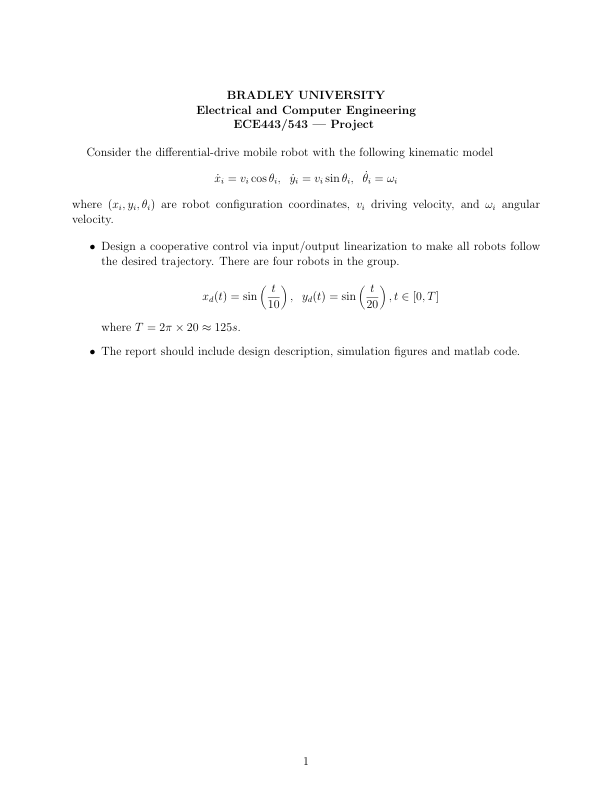

In [1]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("project.pdf")

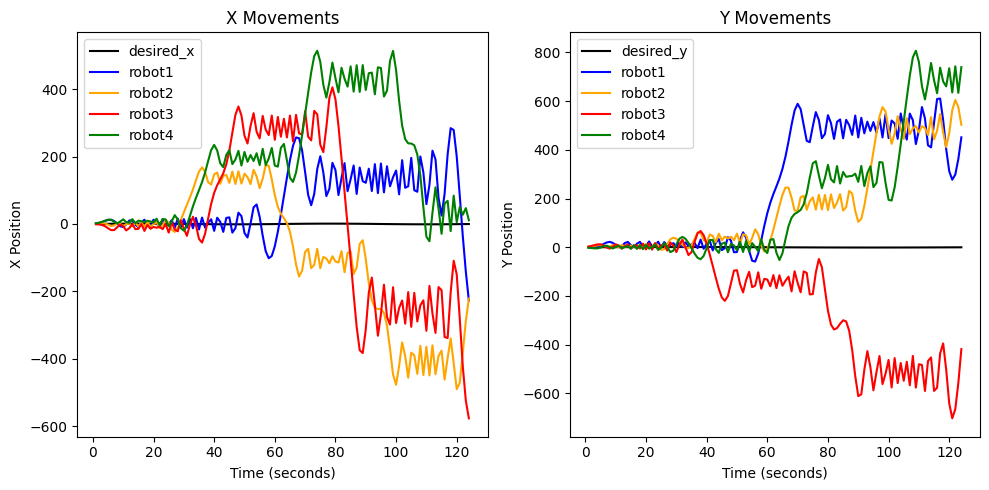

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#alright now lets define the desired paths


t=  np.arange(1, 125) #go for 125 seconds

def x_desired(w):
    return np.sin(w/10)
    
def y_desired(w):
    return np.sin(w/20)

class Robot:
    def __init__(self, x=0, y=0, theta=0, v=0, omega=0):
        self.x =x
        self.y =y
        self.theta = theta
        self.v=v
        self.omega = omega


     # Define kinematic equations for each robot
    def update_pose(self, dt):
        self.x += self.v * np.cos(self.theta) * dt
        self.y += self.v * np.sin(self.theta) * dt
        self.theta += self.omega * dt

def moveRobot(robot, t):
    robot_x_traj = []
    robot_y_traj = []
    for time in t:  # Iterate over the time array t directly
        robot.update_pose(time)  # Pass the current time to update_pose method
        robot_x_traj.append(robot.x)
        robot_y_traj.append(robot.y)
    return robot_x_traj, robot_y_traj

def main():
    
    #instantiate robots
    robot1 = Robot(x=0, y=0, theta=0, v=1, omega=0.1)
    robot2 = Robot(x=1, y=1, theta=np.pi/4, v=0.8, omega=0.2)
    robot3 = Robot(x=-1, y=2, theta=np.pi/2, v=1.2, omega=0.15)
    robot4 = Robot(x=2, y=-1, theta=-np.pi/3, v=0.9, omega=0.18)

    #move the robots
    robot1_x , robot1_y = moveRobot(robot1,t)
    robot2_x , robot2_y = moveRobot(robot2,t)
    robot3_x , robot3_y = moveRobot(robot3,t)
    robot4_x , robot4_y = moveRobot(robot4,t)
   
    #plot movement of robots compared to desired position in x and y directions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    #plot x
    plt.plot(t, x_desired(t), color='black',label='desired_x')
    plt.plot(t, robot1_x,color='blue', label='robot1')
    plt.plot(t, robot2_x,color='orange', label='robot2')
    plt.plot(t, robot3_x,color='red', label='robot3')
    plt.plot(t, robot4_x,color='green', label='robot4')
    plt.title('X Movements')
    plt.xlabel('Time (seconds)')
    plt.ylabel('X Position')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(t, y_desired(t), color='black',label='desired_y')
    plt.plot(t, robot1_y,color='blue', label='robot1')
    plt.plot(t, robot2_y,color='orange', label='robot2')
    plt.plot(t, robot3_y,color='red', label='robot3')
    plt.plot(t, robot4_y,color='green', label='robot4')
    plt.title('Y Movements')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Y Position')
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__=="__main__":
    main()
